# Aerial Cactus Classification Challenge - Kaggle


##### check this link for description:
https://www.kaggle.com/c/aerial-cactus-identification/

####  Dataset Download link:
https://www.kaggle.com/c/13435/download-all


### Importing the Necessary Depedencies

In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### Reading the CSV file

In [3]:
data=pd.read_csv('aerial-cactus/train.csv')
data.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


## Visualizing the Data

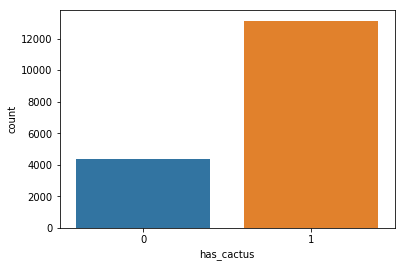

In [4]:
sns.countplot(x='has_cactus', data=data)

In [5]:
label=np.array(data['has_cactus'])

### Applying the Convolutional Neural Network

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(2, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


### Optimization

In [7]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
from PIL import Image
matrix=[]
for i in range(len(data['has_cactus'])):
    #print(data['id'][i])
    im=Image.open('aerial-cactus/train/'+data['id'][i])
    m=np.array(im)
    matrix.append(m)

#### Converting the Image and label into an Numpy array

In [12]:
x=np.array(matrix)
y=np.array(label)

### Training the Model

In [13]:
model.fit(x,y,epochs=8)

Instructions for updating:
Use tf.cast instead.
Epoch 1/8
17500/17500 [==============================] - 9s 501us/sample - loss: 0.2808 - acc: 0.8905
Epoch 2/8
17500/17500 [==============================] - 7s 407us/sample - loss: 0.1419 - acc: 0.9449
Epoch 3/8
17500/17500 [==============================] - 8s 429us/sample - loss: 0.1285 - acc: 0.9521
Epoch 4/8
17500/17500 [==============================] - 9s 534us/sample - loss: 0.1244 - acc: 0.9517
Epoch 5/8
17500/17500 [==============================] - 9s 535us/sample - loss: 0.1149 - acc: 0.9562
Epoch 6/8
17500/17500 [==============================] - 9s 519us/sample - loss: 0.1094 - acc: 0.9575
Epoch 7/8
17500/17500 [==============================] - 10s 569us/sample - loss: 0.1014 - acc: 0.9599
Epoch 8/8
17500/17500 [==============================] - 7s 405us/sample - loss: 0.0977 - acc: 0.9626


#### Overall Accuracy is 96.26%

### Predicitng the Test Data

In [14]:
from tensorflow.keras.preprocessing import image
import os
subm=[]
list=os.listdir('aerial-cactus/test/')
length=len(list)

for i in range(length):
    path = 'aerial-cactus/test/'+list[i]+''
    img = image.load_img(path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    pre=float(classes[0])
    print(pre)
    subm.append(pre)
    if classes[0]>0.5:
        print(list[i]+" is a cactus")
    else:
        print(list[i]+" is not a cactus")


0.9752898216247559
e4212c6c1d16735a90dbc69e6fb29690.jpg is a cactus
0.9979826211929321
56463df8d069f36b9b7fdd7d0a36c95a.jpg is a cactus
0.9999996423721313
8295058949187fea167c59b58dde8fbe.jpg is a cactus
0.9918647408485413
611299a8b3cfe8f1e16dab67cee068a5.jpg is a cactus
0.9984461665153503
00c88441b0510cdb3a6e9b3fa7b632af.jpg is a cactus
0.9999805688858032
330702e6218da3644332916f02afc9e4.jpg is a cactus
1.0
44130e137560620e7df0a2e77fc90257.jpg is a cactus
0.008743624202907085
3ea4285ea835a5d68172e191a36be9bd.jpg is not a cactus
0.9768735766410828
8dd74ededc0f291cee4a6fc2340b85ab.jpg is a cactus
0.07953356206417084
0432589fff3b56bf4f0075189aefa476.jpg is not a cactus
0.9215897917747498
3fe98ef7eccf407bae1a7f208f603e0a.jpg is a cactus
0.5372112989425659
364123fd3a8ad71d1097038289394349.jpg is a cactus
0.8765804171562195
fca2b51228035f054d7d85473b6db3e0.jpg is a cactus
0.9975156784057617
0720dcee795cbeca9c138f207eeacf70.jpg is a cactus
0.9999978542327881
46e7219b224bbcfde144e8b146ba23d1.

0.9997349381446838
2c3f3a4f3216652889d4ea1dd1dcfa91.jpg is a cactus
0.8938943147659302
03fc8ca7431be41f5cc03a62e85c251a.jpg is a cactus
0.008031466975808144
0265d36392efd03a0f0843b8f82d7d92.jpg is not a cactus
0.3793872892856598
04e9ddb36fe829e827259a9beb4250a1.jpg is not a cactus
0.6040817499160767
98ded9c960322c83f07f40885bb8b3e4.jpg is a cactus
0.9996219873428345
2578f056594bbe468295820bb5cf3999.jpg is a cactus
0.9999017715454102
5e047a0ebe63f2a8b9c35f170022dfef.jpg is a cactus
0.9988890290260315
65dba0ff597d93bf7f2613b2d90ce96e.jpg is a cactus
0.9420726895332336
4234330a9ffdbd40d13d3c26d30fa579.jpg is a cactus
0.7511568665504456
6a78d73a09d51ec58ec6fac0842b9f4a.jpg is a cactus
0.999860405921936
77fda0ff6fb19eabacdfaee6113fbbbe.jpg is a cactus
0.8201626539230347
e89393769cb19e203224012e5ad8fb12.jpg is a cactus
0.9934086799621582
30cb6bf073ec3c24b413b6eca4828ea4.jpg is a cactus
0.9995156526565552
cb20d90433f9c180d0cb0ac296783f92.jpg is a cactus
0.435813307762146
d69eea06a148a25ee0055

0.9350746273994446
bf4b4b1bd5b78119537ed50c0ad24095.jpg is a cactus
0.9993614554405212
faf64b96a78b441024a9cb76afbd5036.jpg is a cactus
0.9613913893699646
fad762d75dd9a7d30cf41d0694152ddd.jpg is a cactus
0.0033894625958055258
659da8317dd794dccfb5c0a06c56ed5b.jpg is not a cactus
0.9841415286064148
fcabd7894231b629bee9a9f76516da9c.jpg is a cactus
0.032396718859672546
e3f0ecacde01a12eb82ea91017682d53.jpg is not a cactus
0.7400707006454468
161a8535dba455d1d45a8d41b2b75272.jpg is a cactus
0.02639841102063656
13727454d1eb9db0db00db45b3a8a5fe.jpg is not a cactus
0.002685965271666646
507e2e4a231bf57b3a89b14378c20d46.jpg is not a cactus
0.9876917004585266
0602b2f8462b813fdea5a3bd92c757d9.jpg is a cactus
0.008739607408642769
c8c16030645a0d8b880939f2590f87ef.jpg is not a cactus
0.9999948740005493
f0bb2a944df10f47fe56ad38747a4b14.jpg is a cactus
0.9999949932098389
8b54d7e9efb79e4c46f4d464f5599f25.jpg is a cactus
0.9997077584266663
ea4c4fbe72010dbf433aea2d3d42f70f.jpg is a cactus
0.3764612376689911

0.9999873638153076
a9ad3634359963f85b887c7b97a60c60.jpg is a cactus
0.8379225730895996
82b5359675054beac9841f9005ad1e97.jpg is a cactus
0.9999971389770508
3cde445092795bb319cef4e191196cbb.jpg is a cactus
0.8452630639076233
e649daba14a05dcbcb9ef3a226a03a32.jpg is a cactus
0.004903378896415234
25282933f34fcd40e19a2113359e09fc.jpg is not a cactus
1.0
21c03864908c965fbd8f9243eafba334.jpg is a cactus
0.9971068501472473
e1753775f31f357c0877f0e3743b17d1.jpg is a cactus
0.9999992847442627
4d5f5f54c25e5eb08e6b4c12852e1934.jpg is a cactus
0.008777233771979809
e279d6740ae2847373606c95d20e25cb.jpg is not a cactus
0.0006696825730614364
c86756090489060f4caa8191848b5253.jpg is not a cactus
0.999933123588562
4e20f01b09c9a0d86720e851c626cf25.jpg is a cactus
0.13287855684757233
71f718d29a6cc29c564213e1a2dd85cc.jpg is not a cactus
0.9999872446060181
8a619d1e93b8491fa396d23da8c295be.jpg is a cactus
1.0
f6e4c866613138b3909911ff0a8d1897.jpg is a cactus
0.009234259836375713
a78822bc79d58bc531cb1c10a046617b.j

0.00500204972922802
50e79c8b41fafa5f5b98dd105a9f66b0.jpg is not a cactus
0.36956584453582764
c684fbeccbc1ae2dd07bb557a36ae223.jpg is not a cactus
0.015229858458042145
fabca50fa61ab8561038974fd383bca9.jpg is not a cactus
0.024700026959180832
83170976dac8a5ea20daa609f4083106.jpg is not a cactus
1.0
067b86e32c0fa9ee03f2fc86c84cd8a1.jpg is a cactus
0.9988258481025696
d817caf96fa9aa4fb7ffe0bafdf4eed6.jpg is a cactus
0.9968648552894592
b89c7e76c8640d37f5ceb118e1156661.jpg is a cactus
0.9683147072792053
12d4086143d37fdc043b92f376f28269.jpg is a cactus
0.9588627815246582
077a5f77eb841e7ff04eb6845810049a.jpg is a cactus
0.9556493759155273
f529552f37c6db5ff8b2c001b9815778.jpg is a cactus
0.998646080493927
946012e60c316fb2a8cd5dc3c55165e7.jpg is a cactus
0.009133958257734776
c4d8e5be4c91e57ace2d6dfca23a0587.jpg is not a cactus
0.9969334602355957
4464ad8495c54d4b11be04e90cac2d0e.jpg is a cactus
0.9988411068916321
9386fdeab609cc7c32ac3fc078d25b21.jpg is a cactus
0.004312998149544001
12041d125ece8db

0.002335274824872613
fd30ff53c0125431b35e4168dd72e288.jpg is not a cactus
0.9995965361595154
f09c1e7d2d57068475183549143cd148.jpg is a cactus
0.008945277892053127
cbdef064c24cfa8128279396aa497c64.jpg is not a cactus
0.9999995231628418
389614ea5506bd9cb5b418dc736966ca.jpg is a cactus
0.993919849395752
42ba7bffbcd132a35c824863f5d5eab4.jpg is a cactus
0.9967299699783325
30aaa52aef856ba6161f6c29539c0069.jpg is a cactus
0.0033066170290112495
bf0b2ca22e13755f48f6e165e0881f2b.jpg is not a cactus
0.9926214218139648
2d33b2181420ebbb9f0f84affd2a2b7b.jpg is a cactus
0.9998972415924072
234e592be0070393accb42c0d0104759.jpg is a cactus
0.9419100880622864
c26793bf9e9678b899fac987012790cb.jpg is a cactus
0.34870389103889465
a109835fd28f166ac0a105dd816ee93f.jpg is not a cactus
0.9772772789001465
8cc0831e0d274380feb1b9f599d7be12.jpg is a cactus
0.8300825357437134
3f4fcfc16d304a1bc1df8a67b1b5064c.jpg is a cactus
0.8882036209106445
45ceff748ea7df5ce3d06d0390ef391a.jpg is a cactus
0.5680153369903564
305d9c

0.00643492816016078
bac6e1be5ab0112a8110ee91fa287a5e.jpg is not a cactus
0.6196994781494141
5c86aef5eae8f5353e999efcaa530a48.jpg is a cactus
0.3053586781024933
9fb264b0b6e867fe4e337913c74e3994.jpg is not a cactus
0.9897991418838501
3ee1bd606d343498226ff3502f2cc68c.jpg is a cactus
1.0
f6371b2054c8e2ca70ff8f8b95d89dda.jpg is a cactus
0.02396513521671295
3669401f8eab8a5c1f06b87a62195f43.jpg is not a cactus
0.8375430703163147
84a07e59fea9a9d167a7fd19f812e2ef.jpg is a cactus
0.006324644200503826
911f315471e92ecdf0db8dc8046fcfc1.jpg is not a cactus
0.0021597114391624928
bc44b2ffbb6c520c7246dafb166ebb06.jpg is not a cactus
0.003805938409641385
ff680e4f9bb7283eaf4cbc7530099657.jpg is not a cactus
0.9973453879356384
38913421d89cdd800340373d19d294e8.jpg is a cactus
0.978717565536499
bac35b8ffd8d35dd840d9e83796da386.jpg is a cactus
0.9991647005081177
c952e711b965c1462d6fe401f093a276.jpg is a cactus
0.9515773057937622
0519c9212dd4491f3a33b72636ed6183.jpg is a cactus
0.953536868095398
7f1769bfd6d4a

0.9999802112579346
d9a0da40cf62a8e4a55da0a2800aa41e.jpg is a cactus
0.0033275443129241467
1073dc9ff5136ae80034d1771104eedd.jpg is not a cactus
0.9999722242355347
6f55c6a76385a1500a2070f6a8aa7704.jpg is a cactus
0.0028629587031900883
32936f6e1d123af0d0a917aeefc23da4.jpg is not a cactus
0.9247144460678101
5dec7ebcb2dc43a667b6009e3946ca60.jpg is a cactus
0.9980002045631409
41ddeb431ad5ced5df79a03c67d74ce2.jpg is a cactus
0.0024624038487672806
8223ee316dc0e186b3d19eddd0aa7358.jpg is not a cactus
0.41285601258277893
fac4070a8ba2509138ae7d965badd78b.jpg is not a cactus
0.3971499800682068
29df933c1c8253e6ef16826987d9df12.jpg is not a cactus
0.0019916535820811987
925780169047072a5877fe66fbdc0d34.jpg is not a cactus
0.9913226366043091
00a36d4d6d152404670276fc983273bc.jpg is a cactus
0.6578977704048157
fbebf744bf236db9e702136781da1081.jpg is a cactus
0.08945348113775253
2fc35947d91543c42590da231aee70e8.jpg is not a cactus
0.2428140640258789
c601eeedb227351b8b97a2e5e89bed4d.jpg is not a cactus
0.

0.9989804625511169
b631ffdce7feeca9d72380773cc7d8fc.jpg is a cactus
0.9997572302818298
4ae944c9da1cd23dc80d510a21396f6d.jpg is a cactus
0.8095359802246094
949db71982f0695890331a7c255e131a.jpg is a cactus
0.9293531179428101
e66fd4d909fdac139856ed50b1d3dc9f.jpg is a cactus
0.905325174331665
c3f780bfc56ac78d461610ec5f9c67e4.jpg is a cactus
0.9990554451942444
cdc3b6fb9abcac26a345fa893b430ed4.jpg is a cactus
0.0028150558937340975
861386ab9bfaf97ce69864bf7b7ba52c.jpg is not a cactus
0.999988317489624
6cf0a06874054599cb9b1baa60125690.jpg is a cactus
0.8655173778533936
6006eda8373b6ec4a7877a59e207db54.jpg is a cactus
0.8441088199615479
078cfa961183b30693ea2f13f5ff6d17.jpg is a cactus
0.9609642624855042
5d1e8bd800ba84e9b650e7078cae7c6e.jpg is a cactus
1.0
b047acd8316b16d177fd4db6108d27a4.jpg is a cactus
0.9998830556869507
2d9ec8a5f062a965217d1af34cec0d68.jpg is a cactus
0.9998385906219482
7f301ca38d31a57b15cb98d805f1afc9.jpg is a cactus
1.0
767a933cb3abd677df9fcbdb8d75665f.jpg is a cactus
0.004

0.3442186713218689
f0b435a35a66e2e7cb86966cd8b37bde.jpg is not a cactus
0.005059040617197752
eded89b4f85aac5bd8cb92bde06cf6a0.jpg is not a cactus
1.0
83582b7006fda3c5885879dc170adc54.jpg is a cactus
1.0
a8279fcec460173301e669f64305d423.jpg is a cactus
0.9963625073432922
d98c394d96cae3ae0ae299ba64ecbf1e.jpg is a cactus
0.9397233724594116
c16162b0ceb5585533670ba19ab1b247.jpg is a cactus
0.9997730851173401
95bac59728a171fc4c51fb2b66691dfc.jpg is a cactus
0.999093770980835
9bbd8e977c143835a51191916f103ae8.jpg is a cactus
0.001799799152649939
ef7cde503fbdcab2ab66e54000827a60.jpg is not a cactus
0.010278352536261082
9c413e5208f72035cbdf26060f07c283.jpg is not a cactus
0.9947341680526733
2ec294d81708d4c073f34cc3db70a05a.jpg is a cactus
0.9999939203262329
a5b9428f05065eb564e6dc9364948056.jpg is a cactus
0.9999744892120361
8977d762a9c7e66d1560281807015282.jpg is a cactus
0.005028199404478073
710828e3fe7c73e281208a3ad487b8f3.jpg is not a cactus
0.9963703155517578
c34e0a079935f4559e98303d3a83c238

0.9998894929885864
b5f083a8d8b197dc195ee712d1325caf.jpg is a cactus
0.8449500203132629
4055687d757bcd821f8014c5137c3ae6.jpg is a cactus
1.0
22363eb5f24b6aba43a5d9dcad24a62b.jpg is a cactus
0.719956636428833
b322248729a78e779a422f5a9f4ca92e.jpg is a cactus
0.9831600785255432
172e156d9e1c8261dbd80349921d6700.jpg is a cactus
0.9999797344207764
5d674f2cc16fd3c35a2f48ea043d5884.jpg is a cactus
0.0048589990474283695
f93a0e10ad2cdb385e2323e3b701f4ef.jpg is not a cactus
0.0034614738542586565
7dea01d086baa11cd9887f9076430fa0.jpg is not a cactus
0.008666209876537323
c14dc0d0266dbc5703d1b31ecf0be02d.jpg is not a cactus
1.0
ec37062fa2480d3205f1b1272f707572.jpg is a cactus
0.009637570939958096
2a362cfd79e6104cc8b219afc9df919e.jpg is not a cactus
0.999925971031189
3c1e86f8c41d53c57d75a3d4a099f3cf.jpg is a cactus
0.0033982687164098024
4ed6400cc4afe276c5784ccb20989089.jpg is not a cactus
0.999994158744812
08c7f0b9cad9cf66fdf2edc2cf45fc4c.jpg is a cactus
1.0
e7de90aac322ed1cacf03eb7881ecb96.jpg is a ca

0.0029064477421343327
4f66fb5cf39ba9d282cd78c950677d1a.jpg is not a cactus
0.9999995231628418
51db5df5aada564fab41be9a5a3074a2.jpg is a cactus
0.9932550191879272
669ad35a796fa737d9d829e9ce9b7f11.jpg is a cactus
0.6348447203636169
873191a1575a6292ed92714bfc659b87.jpg is a cactus
0.001248656422831118
d2db3a3e4e54363d9943f534ae711e2a.jpg is not a cactus
0.9983205199241638
75f69aab68c464c9b7e8bc1d93017bbd.jpg is a cactus
0.9262255430221558
47ac83100f1258fb46b839b925655ed8.jpg is a cactus
0.29940104484558105
96682b47ff0b5f26a7d328cfa63f7ab3.jpg is not a cactus
0.9986757636070251
efe6e64cf35b9c558f7a9aa28601f168.jpg is a cactus
0.13060371577739716
aa4d0d4063990a8b68769a52460f8f83.jpg is not a cactus
0.9648169875144958
39affb96c3cc85cacb3dd01c548308e0.jpg is a cactus
0.27579551935195923
f8da58cbeb8e01dd447f551eae5dd2e1.jpg is not a cactus
0.007635577116161585
b2b816439553360b760f307da9f7df97.jpg is not a cactus
0.008392599411308765
f97b3ec8c3794628edc8e133f940764e.jpg is not a cactus
0.694343

0.9981546998023987
3c2504a050b6e034c09a07d9846bce16.jpg is a cactus
0.002095596631988883
8674301e51472de274d1a15fd9ddc51b.jpg is not a cactus
0.9168901443481445
17392be7225a02abd63319e59b1140af.jpg is a cactus
0.6584426760673523
af162b52050664011fde5cf93fc81113.jpg is a cactus
0.001856564893387258
73465cda4cbdde0b66076329778a336f.jpg is not a cactus
0.999832272529602
829c8a912c2b34550c7dc1eb7d8f95ab.jpg is a cactus
0.9918262958526611
869cbb60a6141e8135028d8bba39c93b.jpg is a cactus
0.9972211122512817
203e1bf8403d95a2eec61246fa250d5e.jpg is a cactus
0.005430432036519051
3c5bb2ac0d85a485bc2844ef99fdac80.jpg is not a cactus
0.9992245435714722
66974f2474585b745971bfc36fff694d.jpg is a cactus
0.3110131621360779
0188f5ba08afcb5fa036a8c48aff1d1a.jpg is not a cactus
0.8930432796478271
02f82b5e7a3db0c30bec14dad642c518.jpg is a cactus
0.9139124751091003
5918cd19a2820ae68fffa4b49d8045dd.jpg is a cactus
0.0031566189136356115
775c6522043d8e33871c360c429d25fe.jpg is not a cactus
0.999143123626709
59

0.5070314407348633
9df4aac95a2c36f02dd18895af888ac8.jpg is a cactus
0.14228658378124237
8d4b494b955989a4d6b8648c0f38e941.jpg is not a cactus
0.022119766101241112
c8ad14bf62dbb4d03204277e6fd8d5e3.jpg is not a cactus
0.9959772229194641
5c51054cf92a663282ab0f6395b5f7f5.jpg is a cactus
0.002035468816757202
38c6466e06faa142385f081fcd11134f.jpg is not a cactus
0.9594579339027405
dccecc893160bc69b9eb44fa5a6a1791.jpg is a cactus
0.44539695978164673
a58447fa87a2319d3ea8f7d36e7095f6.jpg is not a cactus
0.9617296457290649
7b82575138098fc239ae27b63f94e06c.jpg is a cactus
0.9997990727424622
4caa66387968797ccb432533c9d6df16.jpg is a cactus
0.958766758441925
cb392fb7da0e281ea7fff571c12144f3.jpg is a cactus
0.034712791442871094
a1b0b2b990c2cd2065ae4a00f1b8c895.jpg is not a cactus
0.9862094521522522
c781ddfd6f4cb8b9b949da94ffc4b29e.jpg is a cactus
0.7187358140945435
5384030deeba63dfc7d49d6d402e7114.jpg is a cactus
0.9467447400093079
2781f657f73d9ee8152b15dd693eef7f.jpg is a cactus
0.004237019922584295


0.0165848471224308
23f08eee5c58b517f326af3d9a4abf7a.jpg is not a cactus
0.6124866008758545
f27f88d847b2bedbd255e838308da72e.jpg is a cactus
0.9987186193466187
f64942f410114888deeb910ca695ce37.jpg is a cactus
0.9998300075531006
30b05f287caf09776197daf683be121e.jpg is a cactus
0.741523027420044
58e5afebba21d86a7eb7fc7a2de79433.jpg is a cactus
0.9986664056777954
87a041044fec0583ef59ab7790d833f4.jpg is a cactus
0.9931010007858276
5b3356068f114c20cb3838a06fefeb04.jpg is a cactus
0.49315616488456726
9cf04f55810195a39ec9e8622c047bde.jpg is not a cactus
0.002871776930987835
051d0b6becb641f28c99c7d9b9cc8bd8.jpg is not a cactus
0.6940395832061768
8cd71c0178f96289f7badbc830c3db8a.jpg is a cactus
0.9994290471076965
4972fcbf7a3459810250416c177d61ee.jpg is a cactus
0.9990348815917969
5518489f709576b1b88e677ba6fe72cb.jpg is a cactus
0.9999963045120239
a2b309c4a67e1488b0e85a4dfc7edd6e.jpg is a cactus
0.990053117275238
11cff5ad97bce6bbf7efdea3560d4b8c.jpg is a cactus
0.7059128284454346
71899d2d2dd191a2

0.003941535484045744
d60e54d67ad1a4e0e907d0c044a229a5.jpg is not a cactus
0.993354082107544
078cfa09790c5c6abe370153b8d5986a.jpg is a cactus
0.9970526695251465
44c8586563bcb2ef284876687e142a4d.jpg is a cactus
0.8315315842628479
bdffd5641cbad5a26aa77034482fc05d.jpg is a cactus
0.9967085123062134
5e111e9b105c5a9f2dadda88b4132a59.jpg is a cactus
0.003494053613394499
af6e6745cbf31670b3c40af603b3c3de.jpg is not a cactus
0.999841570854187
57e4b59f74263fe83ffdc604ad5afc4a.jpg is a cactus
0.9999903440475464
5537b9e63f63b0534872e17841389c3c.jpg is a cactus
0.0549507811665535
19924ae08412a831cff3de793af3bc39.jpg is not a cactus
0.13083170354366302
3c8e578072890bb594392f2c1aea6469.jpg is not a cactus
0.9994441866874695
cf54a72fe570b042e95d690413d18d29.jpg is a cactus
0.4515964388847351
7db6a3a73fc0ebee93a4bc07324f1806.jpg is not a cactus
0.009674263186752796
59172078efef2121129f4d6b711c2ab3.jpg is not a cactus
0.9223247170448303
636e4b2a1513edd805232845a5cf9794.jpg is a cactus
0.9857318997383118


0.06906025856733322
d76dcd9702666179a3bd37919186a547.jpg is not a cactus
0.002847579773515463
7091ea5a8481f5e61877805f01e398e4.jpg is not a cactus
0.050423260778188705
6742540536aa46265716d3e4a78eadd1.jpg is not a cactus
1.0
19867a5025597f2ac036a809403b2b46.jpg is a cactus
1.0
80d7f9a9c37abaed75f9c82f9bc42771.jpg is a cactus
0.005241493694484234
d35256c2e6dd2b5980cdf74e9d540575.jpg is not a cactus
0.10032552480697632
babb5d52a63bb29f7a26c9e56b43b894.jpg is not a cactus
0.46643123030662537
3177b799b6748a7b1c57be07b6e41307.jpg is not a cactus
0.9810973405838013
840a801d2a3ea4d9f25a7a76f7a634c1.jpg is a cactus
0.9995701909065247
00b706122b87e0fa275ff59e39d4d94b.jpg is a cactus
0.9999983310699463
52c15d0d1d1398eb182739797fce1037.jpg is a cactus
0.9710599184036255
1d69c5776bd37c29e384a46cb3447b76.jpg is a cactus
0.9701631665229797
ee19089763a7a59a0e3646c5f7807690.jpg is a cactus
0.8874763250350952
38ec292f25713deeb34b4ae4b6757e16.jpg is a cactus
0.9999916553497314
b124b547124f6cffa7dba3b673

0.9998123049736023
a9c5f268d93ca3401e0201ab19db0d2a.jpg is a cactus
0.9756770730018616
8a0fae670d701858a9756935b6c4d158.jpg is a cactus
0.882969081401825
1fde5a9ba295d0ce1adf1c4266bf6af7.jpg is a cactus
0.9999988079071045
bc5a6be8e456f3291e7aa7cdd745289e.jpg is a cactus
0.9686674475669861
debed8f708b740899ceafb9a3b0a8739.jpg is a cactus
0.5230804681777954
3c7e3d45eb1fb47243f1aef38c51f780.jpg is a cactus
0.7688802480697632
0dc64497365360f378cdc30070d3f504.jpg is a cactus
0.02276790514588356
4fcccde0c6320408d64c7bb4c39a4c3b.jpg is not a cactus
0.9978110194206238
5e18bf2477619ec3f8b92662b5d61c0b.jpg is a cactus
0.8765058517456055
c96dfc599990d51bef1c3fd41087bc3d.jpg is a cactus
0.11197687685489655
7f0745ce189fdb7b7fc43bbeecdb6fb9.jpg is not a cactus
0.9496487975120544
f41fcc29f18c1af1cc46a887b002cc62.jpg is a cactus
0.9711952805519104
332fd3fad616632c909d3616225e675a.jpg is a cactus
0.2500901222229004
68b095d48aa9398eb81521909d68dc47.jpg is not a cactus
0.001969472272321582
66d15cd578fa06

0.8818798065185547
906ce4467e10f4446273f15134be6d28.jpg is a cactus
0.004980480298399925
35a02dabeb316001bee1fb0cb7f63abf.jpg is not a cactus
0.9191144704818726
3d6f7e3baa2b10613638595a7d8cf768.jpg is a cactus
0.9999998807907104
7206def9670131a36e87e79bd3ccd664.jpg is a cactus
0.9999405145645142
0061bd302d735db829418cb90b4e6040.jpg is a cactus
0.9742316603660583
923b45fd7f8b5161fc5a26c0424a96e0.jpg is a cactus
0.3135603666305542
936033215debf0e86eae05c77fe7618c.jpg is not a cactus
0.9999792575836182
dc0272cfddb4fa84a72647182b14e37b.jpg is a cactus
0.9374101758003235
f88eb08c5fb3339366892ceee7cac703.jpg is a cactus
0.60486900806427
5ed5f26639f479f12d86ae653ee3578a.jpg is a cactus
0.9999974966049194
220d1d9fe8d1f3a9ac54908bd65fb3dc.jpg is a cactus
1.0
eb67416c12b195dbd52effb958f16f69.jpg is a cactus
0.9999330043792725
c26ba3c739ba853546c036e2261bc7da.jpg is a cactus
0.999994158744812
43c56aeba34dfca1f3e55b052832f789.jpg is a cactus
0.8736815452575684
3c9a8013c8c1e52c8bcbae694786c1f2.jpg 

0.9981087446212769
09d14fdb544b681ab3d819135b09363f.jpg is a cactus
0.9373162984848022
4d8ea4a53b859d392db851d1388767e8.jpg is a cactus
0.999173104763031
def4c9581c74c2e39b831d7e40cb6f6e.jpg is a cactus
1.0
683d4766b3ba4f22102993fe5800cc84.jpg is a cactus
0.9820041060447693
92b94b12f45e09a52a00e903ad2847a6.jpg is a cactus
0.9576690196990967
3af1c0e9d0c4804d052f081ca661cb2e.jpg is a cactus
0.8583986163139343
e4e678cffb3f106839a16dea399865f1.jpg is a cactus
0.9999731779098511
baf4728431fd2a55ab6a9b9110dd5a98.jpg is a cactus
0.0035766283981502056
3109804ac2f419ff59c4d654c7761cd4.jpg is not a cactus
0.9999617338180542
62f4b2f95f1bb114ff5b99a5b2051af3.jpg is a cactus
0.9851502776145935
a7a7f5b0304ed0337f9d8c0d7b372d92.jpg is a cactus
0.9916173815727234
e44833fe9007d67a7de0f761df087d8e.jpg is a cactus
0.9950829744338989
b4df5dabd16b38974b604058ad7c6cc2.jpg is a cactus
0.9687997102737427
d2076845c338e765a97ac657cf99f40d.jpg is a cactus
0.9999157190322876
747c69bafbb4ec01f80cd0116e10c0a5.jpg i

0.978323221206665
6abc3c3fd69b3487af696c1c945b5e7c.jpg is a cactus
0.9610155820846558
bee03b86bb300e81a3b4480d1a35e801.jpg is a cactus
0.36407503485679626
94e4cce34c408a53bda34332aa1b2eac.jpg is not a cactus
0.9990777969360352
4b97658ba4d854ad7589d5d637eff561.jpg is a cactus
0.9999713897705078
a9652fd28f407163d52e505b549be090.jpg is a cactus
0.9999998807907104
0b300b1b113a2a0880226d747128bd83.jpg is a cactus
0.9996248483657837
64cb7d373c633be12eb1cf9a7be5a448.jpg is a cactus
0.9894852042198181
6e0f3a01cd46f9602da214b0227e9d78.jpg is a cactus
0.9998486042022705
735251d8e2d6e7b7f9a95310ed061099.jpg is a cactus
0.0022261780686676502
925bfb0817e2756be8377e06131fa97e.jpg is not a cactus
0.9992597699165344
4da1b14cc17bcdb63ff39102d72a6238.jpg is a cactus
0.365091472864151
c018c82a94e5e4654146b0e1b6e7b25c.jpg is not a cactus
0.29997944831848145
a1eaa94ec3b5fa39f7112f95f95bb3f5.jpg is not a cactus
0.9956192374229431
70aedb3c481d1a64074f8cfda3f65b33.jpg is a cactus
0.9898603558540344
4d72f4d038

0.9391691088676453
f28b3d3505d0d2fae1dd701cb5fe5f18.jpg is a cactus
0.9402559399604797
3216488ac922a60e0140e0e722f7a4f5.jpg is a cactus
0.024024412035942078
b4f7092d1f8411728fc1c8b93c784997.jpg is not a cactus
0.25452038645744324
3c61351348c3bf7a20222c4713db2a50.jpg is not a cactus
0.963780403137207
fbbecd9974917ad61daf8646bb679050.jpg is a cactus
0.9807029962539673
9cdda32671cb192f096b20c91b46a150.jpg is a cactus
0.8241296410560608
922fc54f1a3c718a98fb7ba1428056dd.jpg is a cactus
0.9525089263916016
6b7bc50b2cc496810f2ecd4c9a2a57ae.jpg is a cactus
0.9988988637924194
92a9f69f82d2bd7108d6694411b7d741.jpg is a cactus
0.9999752044677734
b20e22bcab877b2d174b35c1f82a1980.jpg is a cactus
0.9217748045921326
fef24110b83b6fc439f6fa823ad6ce78.jpg is a cactus
1.0
9c8efc5ec3d0f50c4237299151e6a7a3.jpg is a cactus
0.002565280068665743
809fc05c8f3c0b0b0c05dbe2f27e5ff6.jpg is not a cactus
0.9951083064079285
08f775b789e21a448330e9f931dde1c1.jpg is a cactus
0.9999959468841553
f6eed269f15fc2cd24fc12568891

0.029912404716014862
7c91cc0eb1aa64cfab29109e7ca17778.jpg is not a cactus
0.6620210409164429
44fa3ba34cbda2fbfa94753ca2a1cdad.jpg is a cactus
0.9995241165161133
5a1118ef4e669db6a2fd0270a2411bdd.jpg is a cactus
0.9999998807907104
15d4bb4f2991ad953a19b3a4194c56b4.jpg is a cactus
0.8780352473258972
0ffe72f82e16096f78d8b97c5ba5e2de.jpg is a cactus
0.002946092514321208
254ecde9269c0d63d740baae9484d572.jpg is not a cactus
0.1425687074661255
dd387635a2640d0f5799b2c7b641709c.jpg is not a cactus
0.9999983310699463
203e8365680c05bdddb0673d42e7f08b.jpg is a cactus
0.9920511841773987
b97e9c7af7721e61f8e9636f6ef30318.jpg is a cactus
0.9927812218666077
b02f31609f97aebd7116ff8a3a95375d.jpg is a cactus
0.9820042252540588
170497ec6ad8e0789389f9ff9b851d49.jpg is a cactus
0.7838844656944275
df0a96db57280c1ea8c4aad30789774f.jpg is a cactus
0.021435571834445
8bc302cc8cafa317d9653b62a97a06e2.jpg is not a cactus
0.009236537851393223
8aedef716eaea00f9ae827bd83ede16c.jpg is not a cactus
0.016169462352991104
8c

0.9870328903198242
6e16124dd8363bb104380ddcbbe0af20.jpg is a cactus
0.999980092048645
8d5961ff40497f9c2a70d6ea2beacf0a.jpg is a cactus
0.9858356714248657
0f256c3273082aac6589acda7a167961.jpg is a cactus
0.9999990463256836
b73776f47e5b6fbf35bdcc64a7df016d.jpg is a cactus
0.9974249601364136
10113e80b71449551f5c414925fb6b99.jpg is a cactus
0.9987019300460815
a715480e25a3178372affa70f34612d6.jpg is a cactus
0.9710806012153625
7cd507a91516650e0318cee1a1490098.jpg is a cactus
0.999913215637207
6e737e00fc8ebd5af469dc19e9afc5de.jpg is a cactus
0.9997766613960266
70fad4a0c26b2325e24d2a1a5465f176.jpg is a cactus
0.7834500670433044
d8581fb229d5dafd0270d6c27dd20a0d.jpg is a cactus
1.0
83da1c3e62f7b40080744ef1e43c152e.jpg is a cactus
0.9999116659164429
cabb2f6bcedd259e8789b20dbd807f62.jpg is a cactus
0.9152316451072693
1a01d0d7e47dd68b9885ef5e6baad36a.jpg is a cactus
0.9982786178588867
1bc6494a8396ddc45fb2ce97bea0b55f.jpg is a cactus
0.9865476489067078
068113366978de68298280d5c5708616.jpg is a cact

0.13634109497070312
840ffada1c21261a7bba46ddbbca2d42.jpg is not a cactus
0.9997468590736389
60f77643e2ea7ef2149d986d575b6641.jpg is a cactus
0.5043197870254517
6cd77ee7d4f7f2d383dba81a85c9651c.jpg is a cactus
0.9876070618629456
e7d508a32bd8e12a322c96bfb631dcf6.jpg is a cactus
0.9732081890106201
01e890418e216253bf5339ee4c96b65e.jpg is a cactus
0.9431373476982117
1fda11c3fbd13ed466cefee6d1371003.jpg is a cactus
0.999841570854187
bd08b5722d6a0a1c6d7f50636ba8a038.jpg is a cactus
0.15270255506038666
9095da1f0e520092f766570d950661c8.jpg is not a cactus
0.9988853335380554
8e6888ec1ad25a9d1826eff6dda21409.jpg is a cactus
0.9896638989448547
47adf5d96509c1fbe42976169103383d.jpg is a cactus
0.9781796932220459
f8459f696bbed0543d4550c940a801d8.jpg is a cactus
0.9575072526931763
e965c26229d2ac93ebbb6f34705972e5.jpg is a cactus
0.004078707657754421
d60a104f29a69243ea9a104dd43343b6.jpg is not a cactus
0.0028672185726463795
08d89232a85c5065636d9b36d5d9bf82.jpg is not a cactus
1.0
78a77ebf391ee847d637e7

0.9684901237487793
775d5007b2abb67ee16c1260da427701.jpg is a cactus
1.0
c07dbe8f11c8714ecb3ff2a84eb02fb6.jpg is a cactus
0.9993284940719604
1805cc56e9686f37b736dcefb6dedc81.jpg is a cactus
0.9999862909317017
8edc10d1996a4b019bc6504dea610fdf.jpg is a cactus
0.9980756044387817
ddcc2b26fa35d6f95947de253f6e510d.jpg is a cactus
0.012516729533672333
cca4a5e7588c6b52f777e4f046755c8c.jpg is not a cactus
0.9847552180290222
b379b6715041147a5335a7142e423091.jpg is a cactus
0.9497990608215332
2da54c16c419558a22e04a3386701713.jpg is a cactus
0.9719880819320679
924db5b5cba5a3cad529d9e10dc55773.jpg is a cactus
0.9989132881164551
21711aeb5940a8dc3ed91ad24cbbb4d8.jpg is a cactus
0.9326512813568115
7fd729184ef182899ce3e7a174fb9bc0.jpg is a cactus
0.9027254581451416
7146407daf850c9f20d1c6f88c622443.jpg is a cactus
0.9994720816612244
990dbfe14f4f1bc6e12bf72ff016e038.jpg is a cactus
0.0570262148976326
c2da19ec9ddb986cdc409103dbeb4d6d.jpg is not a cactus
0.9723888635635376
d92eb277cb33354f881129b7ad438607.j

0.9689642190933228
d061d978894ce6c020015451847f017c.jpg is a cactus
0.014813411980867386
d33a8680985970b0b31f148736af2dee.jpg is not a cactus
0.9999988079071045
6caebb05c738bc8cd271cdfe84c3b55f.jpg is a cactus
0.9437796473503113
2b72a56cc2e8b20d0c9eaa3eed322655.jpg is a cactus
0.9783028960227966
ed50301634d7ebd55c90fce8d3e8dab6.jpg is a cactus
0.9999980926513672
fd4d7605207aed8e17574c5157d0532d.jpg is a cactus
0.24861982464790344
3717ee3cb8c70828cf80ad760e0d739d.jpg is not a cactus
0.011430596001446247
8222e723caf31a0bf3ba94f5e34dc486.jpg is not a cactus
0.9790779948234558
418670a0c7f63f960da4772d66e0c1a6.jpg is a cactus
0.9610275626182556
4e9e2e6470d11f2b9be6f0c604d1f96c.jpg is a cactus
0.9999998807907104
87c60828250c8e89e59b158a140e154b.jpg is a cactus
0.9999949932098389
19f059a7ce41b25be1548bc4049b45ec.jpg is a cactus
0.9859327673912048
d76193cb2b367b6d051bbc93c39fcbac.jpg is a cactus
0.003650353057309985
e42c6ed84889ea1c31947db94781bfc7.jpg is not a cactus
0.9092920422554016
45792e

0.013631897047162056
59f434a8fbcada40f8290a9a3e32c7a2.jpg is not a cactus
0.9999309778213501
49050020c0e2e6cdd8134b8d1cdea692.jpg is a cactus
0.982181966304779
58cb5e74ce3ad8d47462e4fd04183cdb.jpg is a cactus
0.9435922503471375
ff9c0bafab5f89febd18c1d6865c079b.jpg is a cactus
0.004179276060312986
5b0ddc8fd679ecbec4f9c7461dae6ffe.jpg is not a cactus
0.9999892711639404
6719f64d3222fc9100a510d8018c6f29.jpg is a cactus
0.007930280640721321
884ee9bb9dac4308d1744ff53ae4fd8b.jpg is not a cactus
0.9932931661605835
5e5b366f2c32dc313146f71ba99ab95c.jpg is a cactus
0.0023568638134747744
511fe69c527b08ab8f05f55a790cc886.jpg is not a cactus
0.9938101172447205
90e041f73045d30be92178e2d6781b3f.jpg is a cactus
0.02315521240234375
afcf9af37e4996ad797933b0e3ab6693.jpg is not a cactus
0.0037664836272597313
54da7d134217cfd74988eb223eae5c4a.jpg is not a cactus
0.903498113155365
c9f48d452bc6fdbbf716a21b78cd3f49.jpg is a cactus
0.9381006956100464
5f422c0d68a73220233c34f0d52bd81a.jpg is a cactus
0.99471008777

0.99600750207901
263c58661cf24e5aa1c88546c75365a2.jpg is a cactus
0.9912064671516418
ff01372293362bd068923395535d831f.jpg is a cactus
0.9794602394104004
4d5fcb5c12fe6682038e768a97ad6fdf.jpg is a cactus
1.0
be69b7b25b2dcca519d07b4967094815.jpg is a cactus
0.0063486299477517605
99228f41410ba1b3ddcb1afbfdb4f2a2.jpg is not a cactus
0.9989637136459351
4e096c24d658d44576d2296903eb4da8.jpg is a cactus
0.4317166209220886
37e78e784409ebf80ff4725454e5b883.jpg is not a cactus
0.9941049218177795
a21f856603a60ec285ace0a722b533eb.jpg is a cactus
0.9966616630554199
55c70eb4dc12fb0da902255aa8f1948c.jpg is a cactus
0.9996805191040039
813898a9aad1432459b7036d3a39c19b.jpg is a cactus
0.9999998807907104
3753bb124bb80feb9e77bdf52a38dfb3.jpg is a cactus
0.9755988717079163
b848e41cacb0e9bb12de730d31b1acb2.jpg is a cactus
0.9991083741188049
7e1dacedaa5454faeb163c23e639f8d5.jpg is a cactus
0.9989105463027954
5762bb146887bf525cbfaa013f398adb.jpg is a cactus
1.0
52dba598dfb38ae82a85d719493b8ba3.jpg is a cactus
0

0.9377201199531555
1a587fa6b960fb2aca895f962ac6f89f.jpg is a cactus
1.0
90c8f64074eb5aded57e3cf95d9f7dc8.jpg is a cactus
0.9991347193717957
42a01c1ef0d207518820030b26c71236.jpg is a cactus
0.9959912896156311
39b6cf716e969fa5ea799cc6c0bd79c4.jpg is a cactus
0.0028938185423612595
7160a1105fabd84de7f430f1fafb9d68.jpg is not a cactus
0.9334091544151306
7884e4039d94faa6876f81edd0d1c4fe.jpg is a cactus
0.9992097616195679
87e6bdda11d7ef3031a9f9be0409806b.jpg is a cactus
0.9999994039535522
e43b0f272e0d5ff7aaf0812738331643.jpg is a cactus
0.7300951480865479
c5ea2c19d05cb9ed420a5dd11249808c.jpg is a cactus
0.9739342927932739
56e109f09ed3b6921a3fba4ab0c1d35c.jpg is a cactus
0.9492884874343872
5d6e04c4adb6a61d36b71e937145bf82.jpg is a cactus
0.004921807441860437
04f2a3913ab0fa5fd403ac15ac49e7f6.jpg is not a cactus
0.8800339102745056
bd25635cb1e68a155ba48fd2db9039a3.jpg is a cactus
0.017494551837444305
7b9e6dcc38f134a34dbc5b52fc680ee5.jpg is not a cactus
0.995623767375946
172b5cdc3de09e1ac587c71400

0.996265709400177
2853e838264d5fab4ff81c502b8f7830.jpg is a cactus
0.14718903601169586
395228df50874f8cacbe18c681445acb.jpg is not a cactus
0.9999948740005493
a1e5a01542e573609ccceb0f4fb31abc.jpg is a cactus
0.9712041616439819
94ad094f354530145ee09cb24e24289b.jpg is a cactus
0.9862552881240845
d2e14509f685254939075f848c85d4ed.jpg is a cactus
0.9997162222862244
dc0c3a444f3c55e444808fe0755754d7.jpg is a cactus
0.9999998807907104
32dc8b46e25c7ab0192cfd795b672057.jpg is a cactus
0.9970082640647888
28b09c59f41589295fe10d3967f28f83.jpg is a cactus
0.9999771118164062
f2467e4a2f594e138103e4e6ac965f74.jpg is a cactus
0.9911177158355713
239ed1e810d68141ffdb3c6c1f9c8988.jpg is a cactus
0.0013438386376947165
01a840130560403d291c6b7cb3ed6cf3.jpg is not a cactus
0.9894931316375732
a2ba0c2c55407a1cb90fa353d348bdcf.jpg is a cactus
0.01312230248004198
0d83e5b47251a2f2db298d77a4b25130.jpg is not a cactus
0.04391774907708168
a8941d441bb946953e285266305d9d36.jpg is not a cactus
0.9997579455375671
08b0c900

### Converting the Predicted values into Pandas Dataframe

In [15]:
x=pd.DataFrame({'id':list,'predict':subm})
x.head()

,id,predict
0,e4212c6c1d16735a90dbc69e6fb29690.jpg,0.975290
1,56463df8d069f36b9b7fdd7d0a36c95a.jpg,0.997983
2,8295058949187fea167c59b58dde8fbe.jpg,1.000000
3,611299a8b3cfe8f1e16dab67cee068a5.jpg,0.991865
4,00c88441b0510cdb3a6e9b3fa7b632af.jpg,0.998446


## Exporting The Prediction

In [16]:
x.to_csv('final_submission.csv')